In [77]:
import scipy as sp

In [78]:
#given the rate, number of period, payment, future value, calculate the present value 
bond_price = sp.pv(rate=0.1 ,nper=2 , pmt=100, fv=1000, when='end')
print('the bond price is {}'.format(-bond_price))

the bond price is 1000.0


### all time worldwide box-office

In [83]:
import urllib
from bs4 import BeautifulSoup
import csv

url = ('http://www.boxofficemojo.com/alltime/world/?pagenum=1&p=.htm')


page = urllib.request.urlopen(url).read()


soup = BeautifulSoup(page,'lxml')
tables = soup.findAll('table')


In [84]:
table = tables[-1]

In [85]:
x = len(table.findAll('tr'))
x

101

In [86]:
f = csv.writer(open("box-office.csv", "w"))
f.writerow(["Rank", "Title", "Studio", "Worldwide", "Domestic", "Domestic_P", "Oversea", "Oversea_P", "Year"])
for row in table.findAll('tr')[1:]:
    cols = row.findAll('td')
    col_data = []
    for col in cols:
        col_data.append(col.getText())
    f.writerow(col_data)


In [87]:
import pandas as pd

In [89]:
box_data = pd.read_csv('box-office.csv')

In [90]:
box_data.head()

,Rank,Title,Studio,Worldwide,Domestic,Domestic_P,Oversea,Oversea_P,Year
0,1,Avatar,Fox,"$2,788.0",$760.5,27.3%,"$2,027.5",72.7%,2009^
1,2,Titanic,Par.,"$2,186.8",$658.7,30.1%,"$1,528.1",69.9%,1997^
2,3,Star Wars: The Force Awakens,BV,"$2,068.2",$936.7,45.3%,"$1,131.6",54.7%,2015
3,4,Jurassic World,Uni.,"$1,671.7",$652.3,39.0%,"$1,019.4",61.0%,2015
4,5,Marvel's The Avengers,BV,"$1,518.8",$623.4,41.0%,$895.5,59.0%,2012


## clean data

In [97]:

box_data["Worldwide"] = box_data["Worldwide"].replace('[\$,]', '', regex=True).astype(float)

In [102]:
def convert_currency(data,cols):
    for each in cols:
        data[each] = data[each].replace('[\$,]', '', regex=True).astype(float)
    return data

In [110]:
def clean_year(data,cols):
    for each in cols:
        data[each] = data[each].replace('[\^]', '', regex=True).astype(int)
    return data

In [106]:
cols_currency = ['Worldwide','Domestic','Oversea']
cols_year = ['Year']

In [111]:
box_data = convert_currency(box_data,cols_currency)

box_data = clean_year(box_data,cols_year)

In [113]:
box_data['currency'] = "USD"

In [114]:
box_data.head()

,Rank,Title,Studio,Worldwide,Domestic,Domestic_P,Oversea,Oversea_P,Year,currency
0,1,Avatar,Fox,2788.0,760.5,27.3%,2027.5,72.7%,2009,USD
1,2,Titanic,Par.,2186.8,658.7,30.1%,1528.1,69.9%,1997,USD
2,3,Star Wars: The Force Awakens,BV,2068.2,936.7,45.3%,1131.6,54.7%,2015,USD
3,4,Jurassic World,Uni.,1671.7,652.3,39.0%,1019.4,61.0%,2015,USD
4,5,Marvel's The Avengers,BV,1518.8,623.4,41.0%,895.5,59.0%,2012,USD


Let's suppose the interest rate is 5% annually, then let's adjust all box to year 2017, and see how the rank changes

In [117]:
box_data['Worldwide_inflation_adjusted'] = -sp.fv(0.05,2017-box_data['Year'],pmt = 0 ,pv=box_data['Worldwide'])

In [135]:
adjusted_box = box_data.sort_values(by='Worldwide_inflation_adjusted',ascending=False).head(10)

In [187]:
import matplotlib.pyplot as plt
import seaborn
import numpy as np

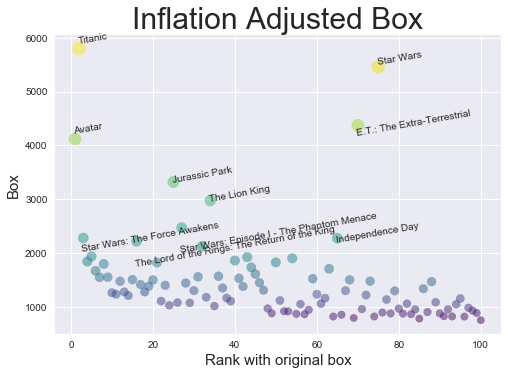

In [241]:


names = adjusted_box["Title"][:10]
ranks = adjusted_box["Rank"][:10]
box = adjusted_box['Worldwide_inflation_adjusted'][:10]
fig, ax = plt.subplots()
plt.scatter(box_data['Rank'],
            box_data['Worldwide_inflation_adjusted'],
            s=(box_data['Worldwide_inflation_adjusted'])**0.6,
            c=np.log10(box_data['Worldwide_inflation_adjusted']),
            cmap='viridis',
            alpha =0.5
           )
for label,x,y in zip(names,ranks,box):
    ax.annotate(label, (x, y),
                xytext=(-2, 10),
                textcoords='offset points',
                ha='left',
                rotation=10,
                size = 10)
plt.title("Inflation Adjusted Box", size = 30)
plt.xlabel("Rank with original box", size = 15)
plt.ylabel('Box', size = 15)

plt.show()

In [152]:
adjusted_box.head(10)

,Rank,Title,Studio,Worldwide,Domestic,Domestic_P,Oversea,Oversea_P,Year,currency,Worldwide_inflation_adjusted
1,2,Titanic,Par.,2186.8,658.7,30.1%,1528.1,69.9%,1997,USD,5802.231422
74,75,Star Wars,Fox,775.4,461.0,59.5%,314.4,40.5%,1977,USD,5458.807247
69,70,E.T.: The Extra-Terrestrial,Uni.,792.9,435.1,54.9%,357.8,45.1%,1982,USD,4373.648585
0,1,Avatar,Fox,2788.0,760.5,27.3%,2027.5,72.7%,2009,USD,4119.145777
24,25,Jurassic Park,Uni.,1029.2,402.5,39.1%,626.7,60.9%,1993,USD,3319.272862
33,34,The Lion King,BV,968.5,422.8,43.7%,545.7,56.3%,1994,USD,2974.770758
26,27,Star Wars: Episode I - The Phantom Menace,Fox,1027.0,474.5,46.2%,552.5,53.8%,1999,USD,2471.597953
2,3,Star Wars: The Force Awakens,BV,2068.2,936.7,45.3%,1131.6,54.7%,2015,USD,2280.190500
64,65,Independence Day,Fox,817.4,306.2,37.5%,511.2,62.5%,1996,USD,2277.245821
15,16,The Lord of the Rings: The Return of the King,NL,1119.9,377.8,33.7%,742.1,66.3%,2003,USD,2217.325398
